## Bike Sharing Demand
- Forecast use of a city bikeshare system
- Kaggle 데이터, 2011년도 ~ 2012년도 1시간 간격으로 자전거 대여 횟수가 기록


## 컬럼정보

- datetime
  날짜, 시간정보

- season
  1=봄, 2=여름, 3=가을, 4=겨울

- holyday
  1=휴일, 0=휴일 아닌날

- workingday
  1=주중, 0=주말

- weather
  1=맑음,구름낀 흐림 2=안개, 흐림  3=가벼운눈,비,천둥 4=심한눈,비,번개

- temp 
  온도

- atemp
  체감온도

- humidity
  상대습도

- windspeed
  풍속

- casual
  사전에 등록되지 않은 횟수

- registered
  사전에 등록한 사용자가 대여한 횟수

- count
  대여 횟수

In [1]:
'''
1) datetime 컬럼을 년도, 월, 시간 등의 컬럼으로 재생성
2) 불필요한 컬럼 삭제
'''

'\n1) datetime 컬럼을 년도, 월, 시간 등의 컬럼으로 재생성\n2) 불필요한 컬럼 삭제\n'

In [2]:
import pandas as pd 
df_bike = pd.read_csv('train.csv')

In [3]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# 결측치 확인
df_bike.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

##1. datetime 컬럼 전처리

In [5]:
# datetime 컬럼
df_bike['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [6]:
df_bike.datetime

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [7]:
# 우선, 날짜와 시간 분리
df_bike.datetime.loc[0].split()

['2011-01-01', '00:00:00']

In [8]:
# df_bike['temptime'] = df_bike.datetime.split() # series 형태로 split() 불가능

In [9]:
# 날짜와 시간 분리한 것을 temp 컬럼 생성
df_bike['temptime'] = df_bike.datetime.apply(lambda x: x.split())

In [10]:
df_bike.temptime

0        [2011-01-01, 00:00:00]
1        [2011-01-01, 01:00:00]
2        [2011-01-01, 02:00:00]
3        [2011-01-01, 03:00:00]
4        [2011-01-01, 04:00:00]
                  ...          
10881    [2012-12-19, 19:00:00]
10882    [2012-12-19, 20:00:00]
10883    [2012-12-19, 21:00:00]
10884    [2012-12-19, 22:00:00]
10885    [2012-12-19, 23:00:00]
Name: temptime, Length: 10886, dtype: object

In [11]:
df_bike.temptime.loc[0][0] # 날짜 확인, 밑에 x[0]인 이유

'2011-01-01'

In [12]:
# 년도-월-일, 시간,분 컬럼 등을 생성
df_bike['year'] = df_bike.temptime.apply(lambda x: x[0].split('-')[0])
df_bike['month'] = df_bike.temptime.apply(lambda x: x[0].split('-')[1])
df_bike['day'] = df_bike.temptime.apply(lambda x: x[0].split('-')[2])
df_bike['hour'] = df_bike.temptime.apply(lambda x: x[1].split(':')[0])
df_bike['minute'] = df_bike.temptime.apply(lambda x: x[1].split(':')[1])

In [13]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  temptime    10886 non-null  object 
 13  year        10886 non-null  object 
 14  month       10886 non-null  object 
 15  day         10886 non-null  object 
 16  hour        10886 non-null  object 
 17  minute      10886 non-null  object 
dtypes: float64(3), int64(8), object(7)
memory usage: 1.5+ MB


In [14]:
# 날짜-월-일 등의 컬럼을 int형 변환
df_bike['year'] = pd.to_numeric(df_bike.year, errors='coerce')  # errors='coerce'는 예외발생을 NaN으로 처리
df_bike['month'] = pd.to_numeric(df_bike.month, errors='coerce')
df_bike['day'] = pd.to_numeric(df_bike.day, errors='coerce')
df_bike['hour'] = pd.to_numeric(df_bike.hour, errors='coerce')
df_bike['minute'] = pd.to_numeric(df_bike.minute, errors='coerce')

In [15]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  temptime    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  hour        10886 non-null  int64  
 17  minute      10886 non-null  int64  
dtypes: float64(3), int64(13), object(2)
memory usage: 1.5+ MB


In [16]:
df_bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temptime,year,month,day,hour,minute
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,"[2011-01-01, 00:00:00]",2011,1,1,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,"[2011-01-01, 01:00:00]",2011,1,1,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,"[2011-01-01, 02:00:00]",2011,1,1,2,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,"[2011-01-01, 03:00:00]",2011,1,1,3,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,"[2011-01-01, 04:00:00]",2011,1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,"[2012-12-19, 19:00:00]",2012,12,19,19,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,"[2012-12-19, 20:00:00]",2012,12,19,20,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,"[2012-12-19, 21:00:00]",2012,12,19,21,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,"[2012-12-19, 22:00:00]",2012,12,19,22,0


In [17]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  temptime    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  hour        10886 non-null  int64  
 17  minute      10886 non-null  int64  
dtypes: float64(3), int64(13), object(2)
memory usage: 1.5+ MB


In [18]:
# 요일 추가하기

# weekday() 확인
from datetime import datetime
df_bike['temptime'][0][0]

'2011-01-01'

In [19]:
'''
datetime.datetime 모듈에서 weekday()는
0:월, 1:화, 2:수, ....반환
'''
datetime.strptime(df_bike['temptime'][0][0], '%Y-%m-%d').weekday()

5

In [20]:
df_bike['dayofweek'] = df_bike.temptime.apply(lambda x: datetime.strptime(x[0], '%Y-%m-%d').weekday())

In [21]:
df_bike['dayofweek']

0        5
1        5
2        5
3        5
4        5
        ..
10881    2
10882    2
10883    2
10884    2
10885    2
Name: dayofweek, Length: 10886, dtype: int64

In [22]:
# 불필요한 컬럼 제거
# df_bike.drop(['datetime','temptime','minute'], axis=1, inplace=True)

- 종속변수 count 컬럼을 통한 다양한 시각화

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


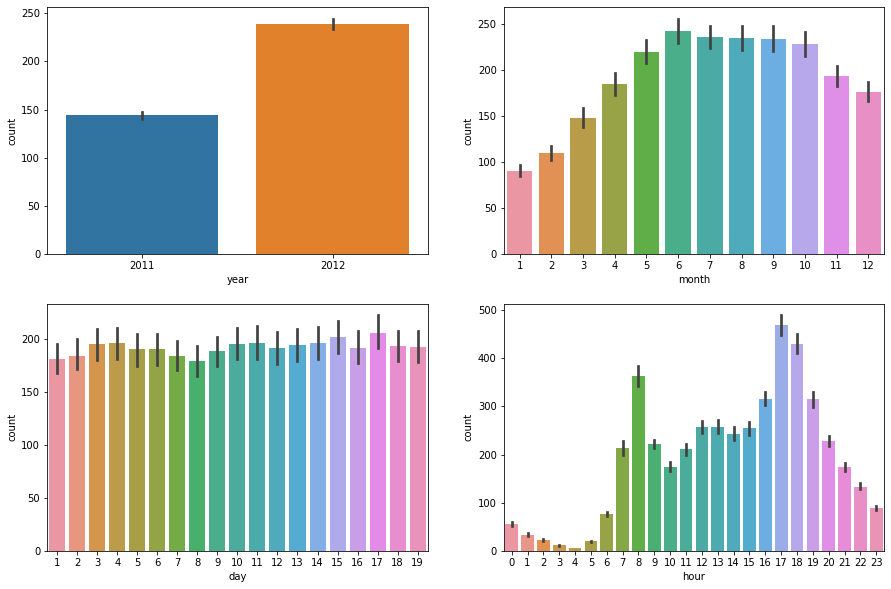

In [23]:
# 년도-월별-날짜별-시간별 자전거대여 횟수
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(data=df_bike, x='year', y='count')

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(data=df_bike, x='month', y='count')

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(data=df_bike, x='day', y='count')

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(data=df_bike, x='hour', y='count')

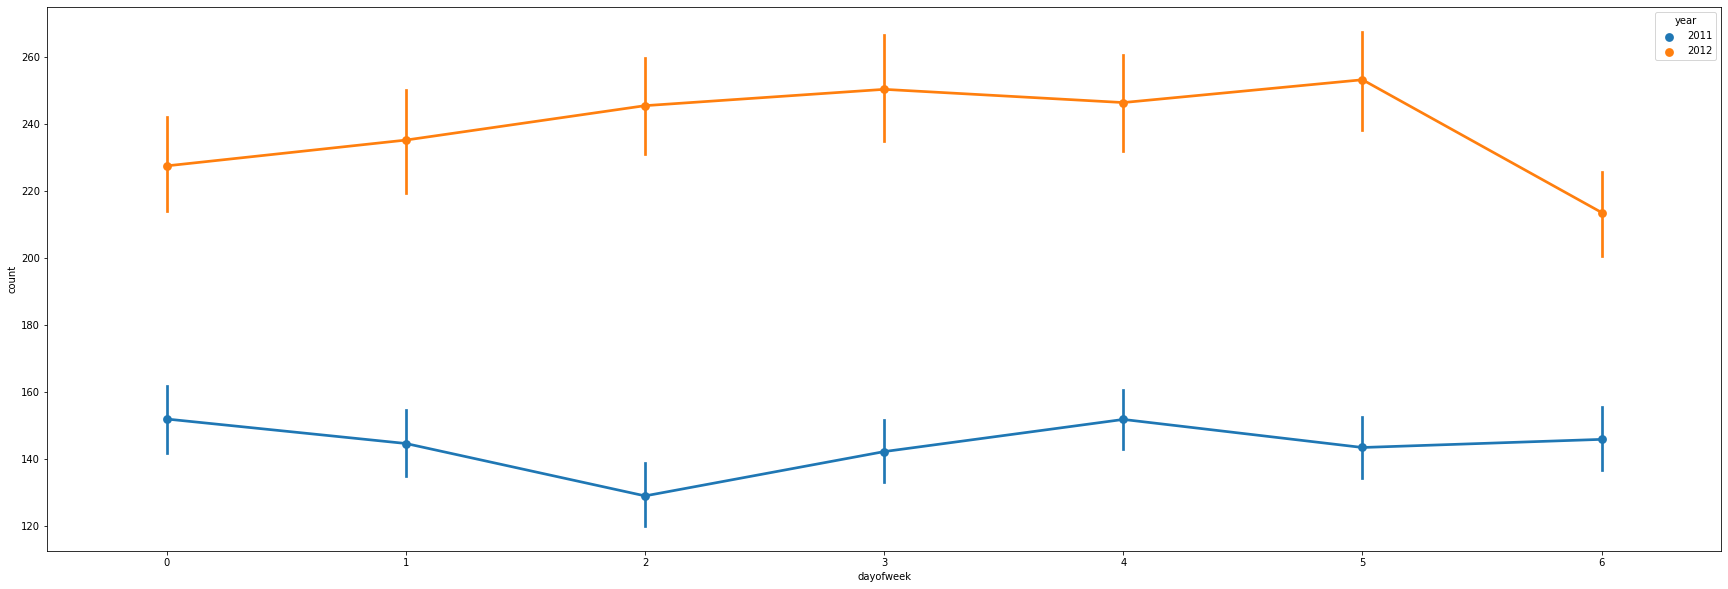

In [25]:
# 요일별 자전거대여 횟수
plt.figure(figsize=(30, 10))
sns.pointplot(data=df_bike, x='dayofweek', y='count', hue='year')

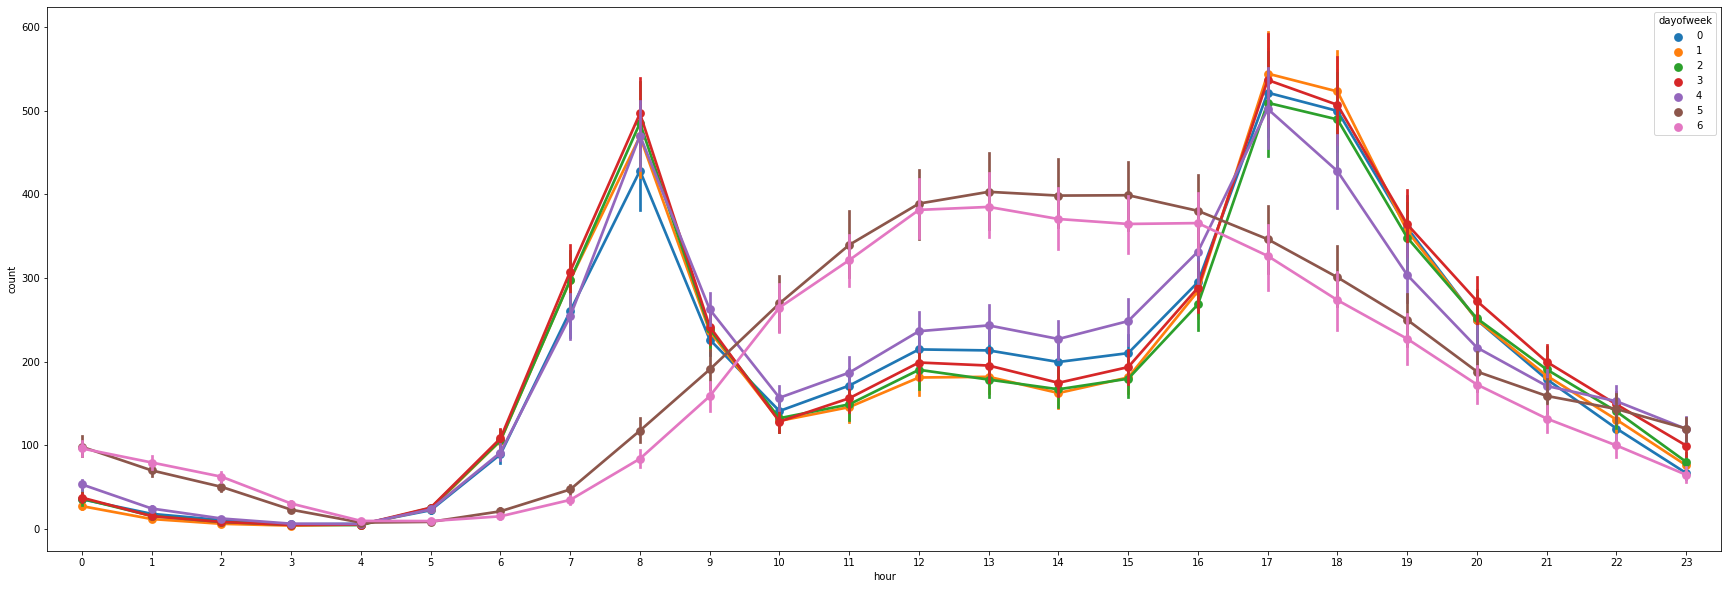

In [26]:
plt.figure(figsize=(30, 10))
sns.pointplot(data=df_bike, x='hour', y='count', hue='dayofweek')

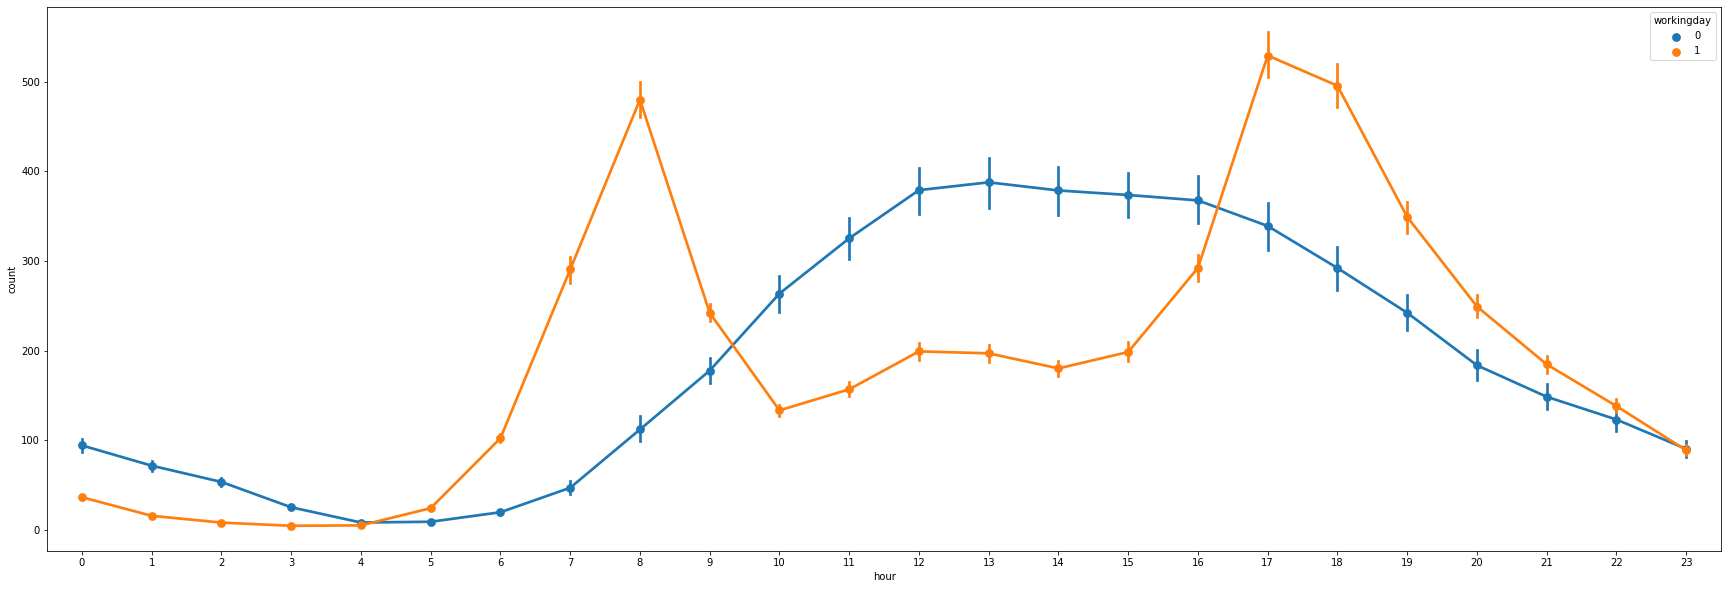

In [27]:
# workingday 컬럼, 1=주중 0=주말
plt.figure(figsize=(30, 10))
sns.pointplot(data=df_bike, x='hour', y='count', hue='workingday')

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(data=df_bike, x='year', y='count')

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(data=df_bike, x='month', y='count')

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(data=df_bike, x='day', y='count')

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(data=df_bike, x='hour', y='count')

# https://www.kaggle.com/kwonyoung234/for-beginner